In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Preprocessing

In [2]:
ROOT_DIR = os.getcwd()
DATA_DIR = os.path.join(ROOT_DIR, 'ml-100k')

## Modify data: seperate by `\t`

In [ ]:
ratings = pd.read_csv(os.path.join(DATA_DIR, 'ratings.csv'))
ratings.to_csv(os.path.join(DATA_DIR, 'mod_ratings.csv'), sep='\t', index=False)
tags = pd.read_csv(os.path.join(DATA_DIR, 'tags.csv'))
tags.to_csv(os.path.join(DATA_DIR, 'mod_tags.csv'), sep='\t', index=False)
movies = pd.read_csv(os.path.join(DATA_DIR, 'movies.csv'))
movies.to_csv(os.path.join(DATA_DIR, 'mod_movies.csv'), sep='\t', index=False)
links = pd.read_csv(os.path.join(DATA_DIR, 'links.csv'))
links.to_csv(os.path.join(DATA_DIR, 'mod_links.csv'), sep='\t', index=False)

## Read data: ratings, movies

In [24]:
print('Data loading...')

#Loading datasets
ratings_list = [i.strip().split("\t") for i in open(os.path.join(DATA_DIR,'mod_ratings.csv'), 'r').readlines()]
ratings_df = pd.DataFrame(ratings_list[1:], columns = ['userId', 'movieId', 'rating', 'timestamp'])
ratings_df['userId'] = ratings_df['userId'].apply(pd.to_numeric)
ratings_df['movieId'] = ratings_df['movieId'].apply(pd.to_numeric)
ratings_df['rating'] = ratings_df['rating'].astype(float)

movies_list = [i.strip().split("\t") for i in open(os.path.join(DATA_DIR,'mod_movies.csv'),encoding='latin-1').readlines()]
movies_df = pd.DataFrame(movies_list[1:], columns = ['movieId', 'title', 'genres'])
movies_df['movieId'] = movies_df['movieId'].apply(pd.to_numeric)

tags_list = [i.strip().split("\t") for i in open(os.path.join(DATA_DIR,'mod_tags.csv'), 'r').readlines()]
tags_df = pd.DataFrame(tags_list[1:], columns=['userId', 'movieId', 'tag', 'timestamp'])
tags_df['userId'] = tags_df['userId'].apply(pd.to_numeric)
tags_df['movieId'] = tags_df['movieId'].apply(pd.to_numeric)

print("Data loading complete!")
print("Data preprocessing...")

Data loading...
Data loading complete!
Data preprocessing...


In [18]:
ratings_df.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [19]:
movies_df.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [20]:
tags_df.head(3)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992


## Create `users.csv`

In [36]:
users_1m_path = os.path.join(DATA_DIR, 'users-1m.dat')
users_1m_list = [i.strip().split("::") for i in open(users_1m_path, 'r').readlines()]
users_1m_df = pd.DataFrame(users_1m_list, columns=['userId', 'gender', 'age', 'occupation', 'zip'])
users_1m_df['userId'] = users_1m_df['userId'].apply(pd.to_numeric)

In [37]:
users_100k = users_1m_df[users_1m_df['userId'].isin(ratings_df['userId'])]
users_100k.to_csv(os.path.join(DATA_DIR, 'users.csv'), sep='\t', index=False)

In [4]:
users_list = [i.strip().split("\t") for i in open(os.path.join(DATA_DIR,'users.csv'), 'r').readlines()]
users_df = pd.DataFrame(users_list[1:], columns=['userId', 'gender', 'age', 'occupation', 'zip'])
users_df.head()

,userId,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


# EDA
## Ratings

In [8]:
# check null
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

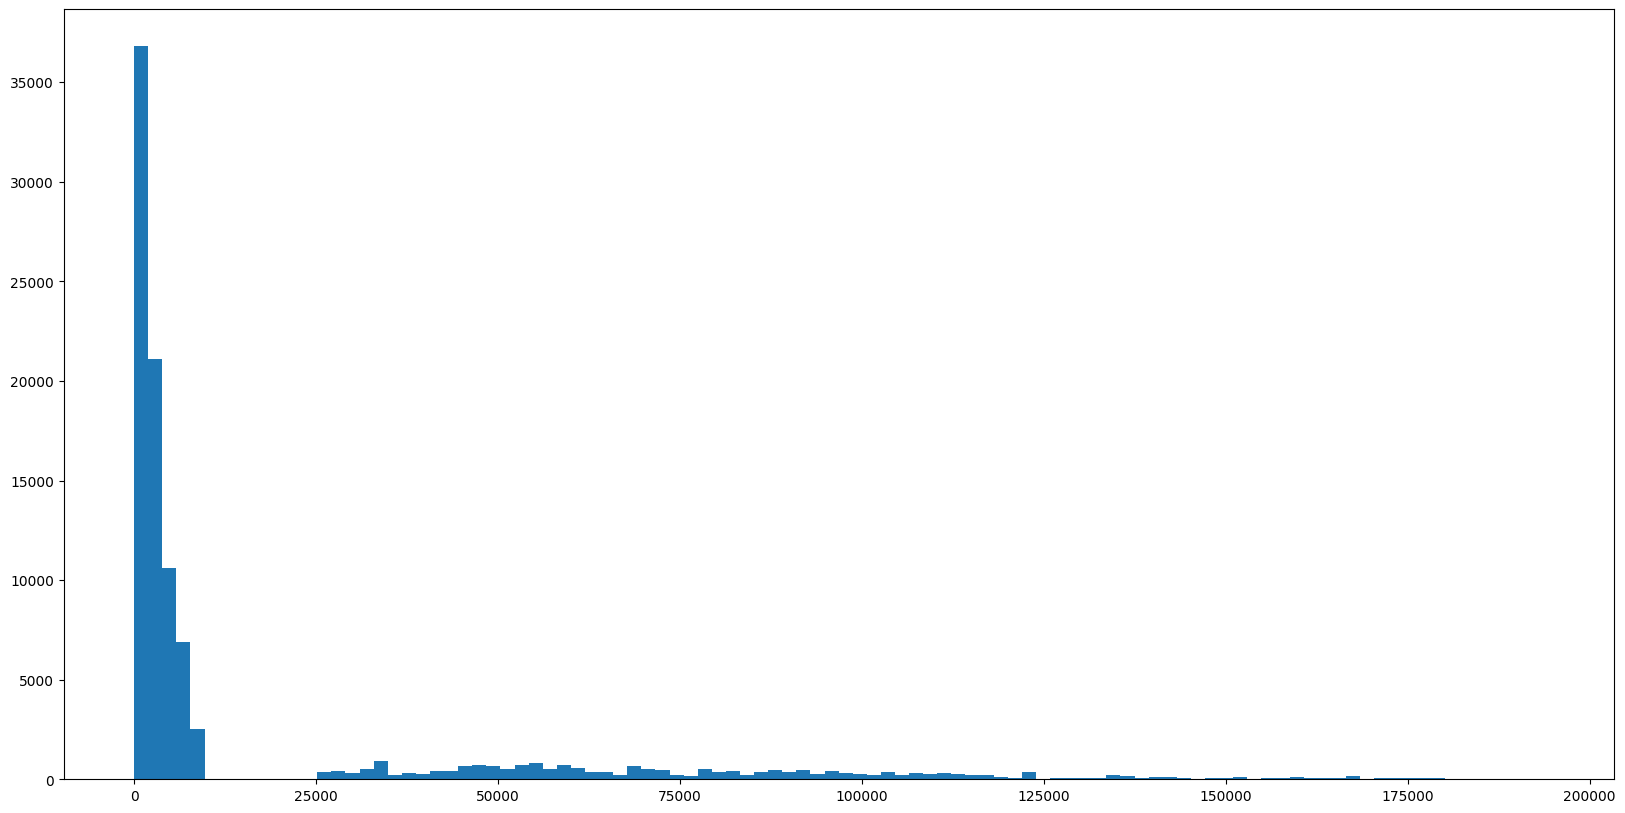

In [27]:
# check the distribution of movies choosen by user
plt.figure(figsize=(20,10))
plt.hist(ratings_df["movieId"], bins=100)
plt.show()

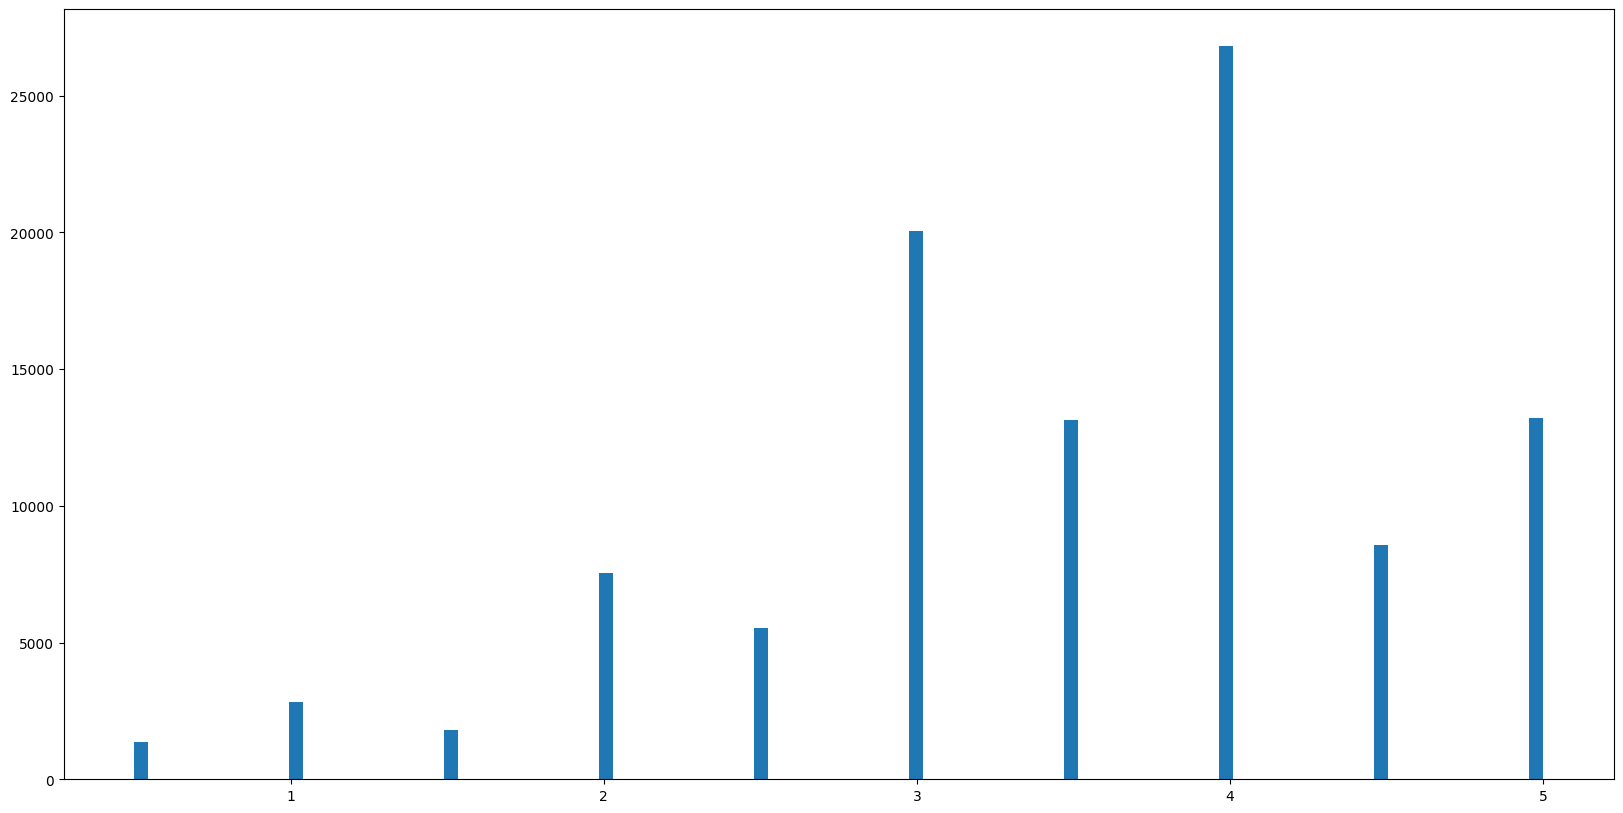

In [26]:
# check the distribution of ratings by user
plt.figure(figsize=(20,10))
plt.hist(ratings_df["rating"], bins=100)
plt.show()

In [9]:
# check the maximum value of UserID
print(len(set(ratings_df["userId"])) == max([int(i) for i in set(ratings_df["userId"])]))
print(max([int(i) for i in set(ratings_df["userId"])]))

True
610
